In [1]:
import uproot as u
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from global_settings import *
from df_utils import *
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [2]:
run = "run3"
data = True
dm_type = "fermion"
mass = "0.05"
ratio = "0.6"
target_pot = 1.
signal_pot = {}
extra_factor= 2. 

signal_correction = { "0.01":0.94903385, "0.02":1.03561568, "0.03":1.02326517, "0.04":1.00641579, 
                     "0.05":1.00650082, "0.06":1.01293082, "0.07":1.07433777, 
                     "0.08":1.10175345, "0.09":1.0415591 , "0.10":1.1014797}


if(dm_type == "fermion"):
    signal_pot = { "0.01":3.9e19, "0.02":3.4e+20, "0.03":1.49e+21, 
                  "0.04":5.59e+21, "0.05":1.89e+22, "0.06":6.02e+22,
                  "0.07":1.8e+23, "0.08":5.6e+23, 
                  "0.09":1.2e+24, "0.10":2.9e+25}

else: 
    signal_pot = { "0.01":8.8e+20, "0.02": 9.05e+21, "0.03":4.7e+22, 
                  "0.04":1.8e+23, "0.05":7.7e+23, "0.06":2.7e+24,
                  "0.07":7.9e+24, "0.08":2.34e+25, 
                  "0.09":3.9e+25, "0.10":8.8e+25}

scalings = {}

if(run == "run1"):
    run_flag = "Run 1"
    target_pot = 2.2e+20
    scalings = scalings_run1
    pot_label = r' $2.2\times10^{20}$ POT'
    meson_correction_pi0 = 11.7
    meson_correction_eta = 7.2
else:
    run_flag = "Run 3"
    target_pot = 5.0e20
    scalings = scalings_run3
    pot_label = r'$5.0\times10^{20}$ POT'
    meson_correction_pi0 = 11.7
    meson_correction_eta = 7.2

nu_scaling = target_pot*scalings["nu"]
dirt_scaling = target_pot*scalings["dirt"]
offbeam_scaling = scalings["beamoff"]
multisim_uncertainty = 0.2 
detvars_uncertainty = 0.3

In [3]:
def GetStatsUncert(df_a, weight_array,my_custom_bins,plot_var):
    (counts_df, bins_df) = np.histogram(df_a[plot_var], bins = my_custom_bins, weights=np.square(weight_array))
    return counts_df 

In [4]:
base_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/" + run + "_samples/" 
signal_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/" + run + "_signal/"
plots_dir = "/home/lmlepin/Desktop/Plots_DT_Drive/2023/data_mc/"

df_signal = pd.read_csv(signal_dir + "{}_dt_ratio_{}_{}_pi0_CNN_scores_8441_steps.csv".format(run,ratio,mass))
df_nu = pd.read_csv(base_dir + run + "_nu_overlay_CNN_scores_8441_steps.csv")
df_dirt = pd.read_csv(base_dir + run + "_dirt_CNN_scores_8441_steps.csv")
df_beamoff = pd.read_csv(base_dir + run + "_offbeam_CNN_scores_8441_steps.csv")
df_beamon = pd.read_csv(base_dir + run + "_beamon_CNN_scores_8441_steps.csv")


# good run fix 

good_run_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/good_runs/"
good_run_df = pd.read_csv(good_run_dir + "goodruns_" + run + ".txt")
good_run_list = good_run_df['good_run'].to_numpy()

print("Number of entries before good run filter: ", len(df_beamon))

df_beamon = df_beamon[df_beamon['run_number'].isin(good_run_list)]

print("Number of entries after good run filter: ", len(df_beamon))
###########################


signal_scaling = target_pot*correction_dic_a["pi0"][mass]*meson_correction_pi0/df_signal['total_pot'][0]

'''
df_nu = pd.read_csv(base_dir + run + "_nu_overlay_CNN.csv")
df_dirt = pd.read_csv(base_dir + run + "_dirt_CNN.csv")
df_beamoff = pd.read_csv(base_dir + run + "_offbeam_CNN.csv")
df_beamon = pd.read_csv(base_dir + run + "_beamon_CNN.csv")
'''

MC_weight_branch(df_nu)
MC_weight_branch(df_dirt)


print(np.mean(df_nu['weight']))
print(np.mean(df_dirt['weight']))

Number of entries before good run filter:  7883
Number of entries after good run filter:  7684
0.9539840798609495
0.9717689941506281


In [5]:
df_signal_eta = pd.read_csv(signal_dir + "{}_dt_ratio_{}_{}_eta_CNN_scores_8441_steps.csv".format(run,ratio,mass))
signal_scaling_eta = target_pot*meson_correction_eta/df_signal_eta['total_pot'][0]
print("Number of dark tridents Eta M_A="+str(mass)+" :" + str(len(df_signal_eta)*signal_scaling_eta))

Number of dark tridents Eta M_A=0.05 :34.27977899153832


In [6]:
print("Showing results for: " + run)
print("Number of dark tridents Pi0 M_A="+str(mass)+" :" + str(len(df_signal)*signal_scaling))
print("Number of neutrinos: " + str(np.sum(df_nu['weight'])*nu_scaling))
print("Number of dirt: " + str(np.sum(df_dirt['weight'])*dirt_scaling))
print("Number of beam-off: " + str(len(df_beamoff)*offbeam_scaling))
print("Number of beam-on: " + str(len(df_beamon)))

bkg_exp = np.sum(df_nu['weight'])*nu_scaling + np.sum(df_dirt['weight'])*dirt_scaling + len(df_beamoff)*offbeam_scaling

data_mc = len(df_beamon)/bkg_exp


data_mc_legend = 'Data/MC = {:.2f}'.format(data_mc)
dt_legend = r'Dark tridents'
nu_legend = r'In cryo $\nu$'
dirt_legend = r'Out of cryo $\nu$'
beamoff_legend = r'Beam-off'
beamon_legend = r'Beam-on'


Showing results for: run3
Number of dark tridents Pi0 M_A=0.05 :1909.1067723628248
Number of neutrinos: 2759.0810094987237
Number of dirt: 402.30760000485947
Number of beam-off: 4826.072728319923
Number of beam-on: 7684


In [7]:
nbins = 40

1895.364236437327


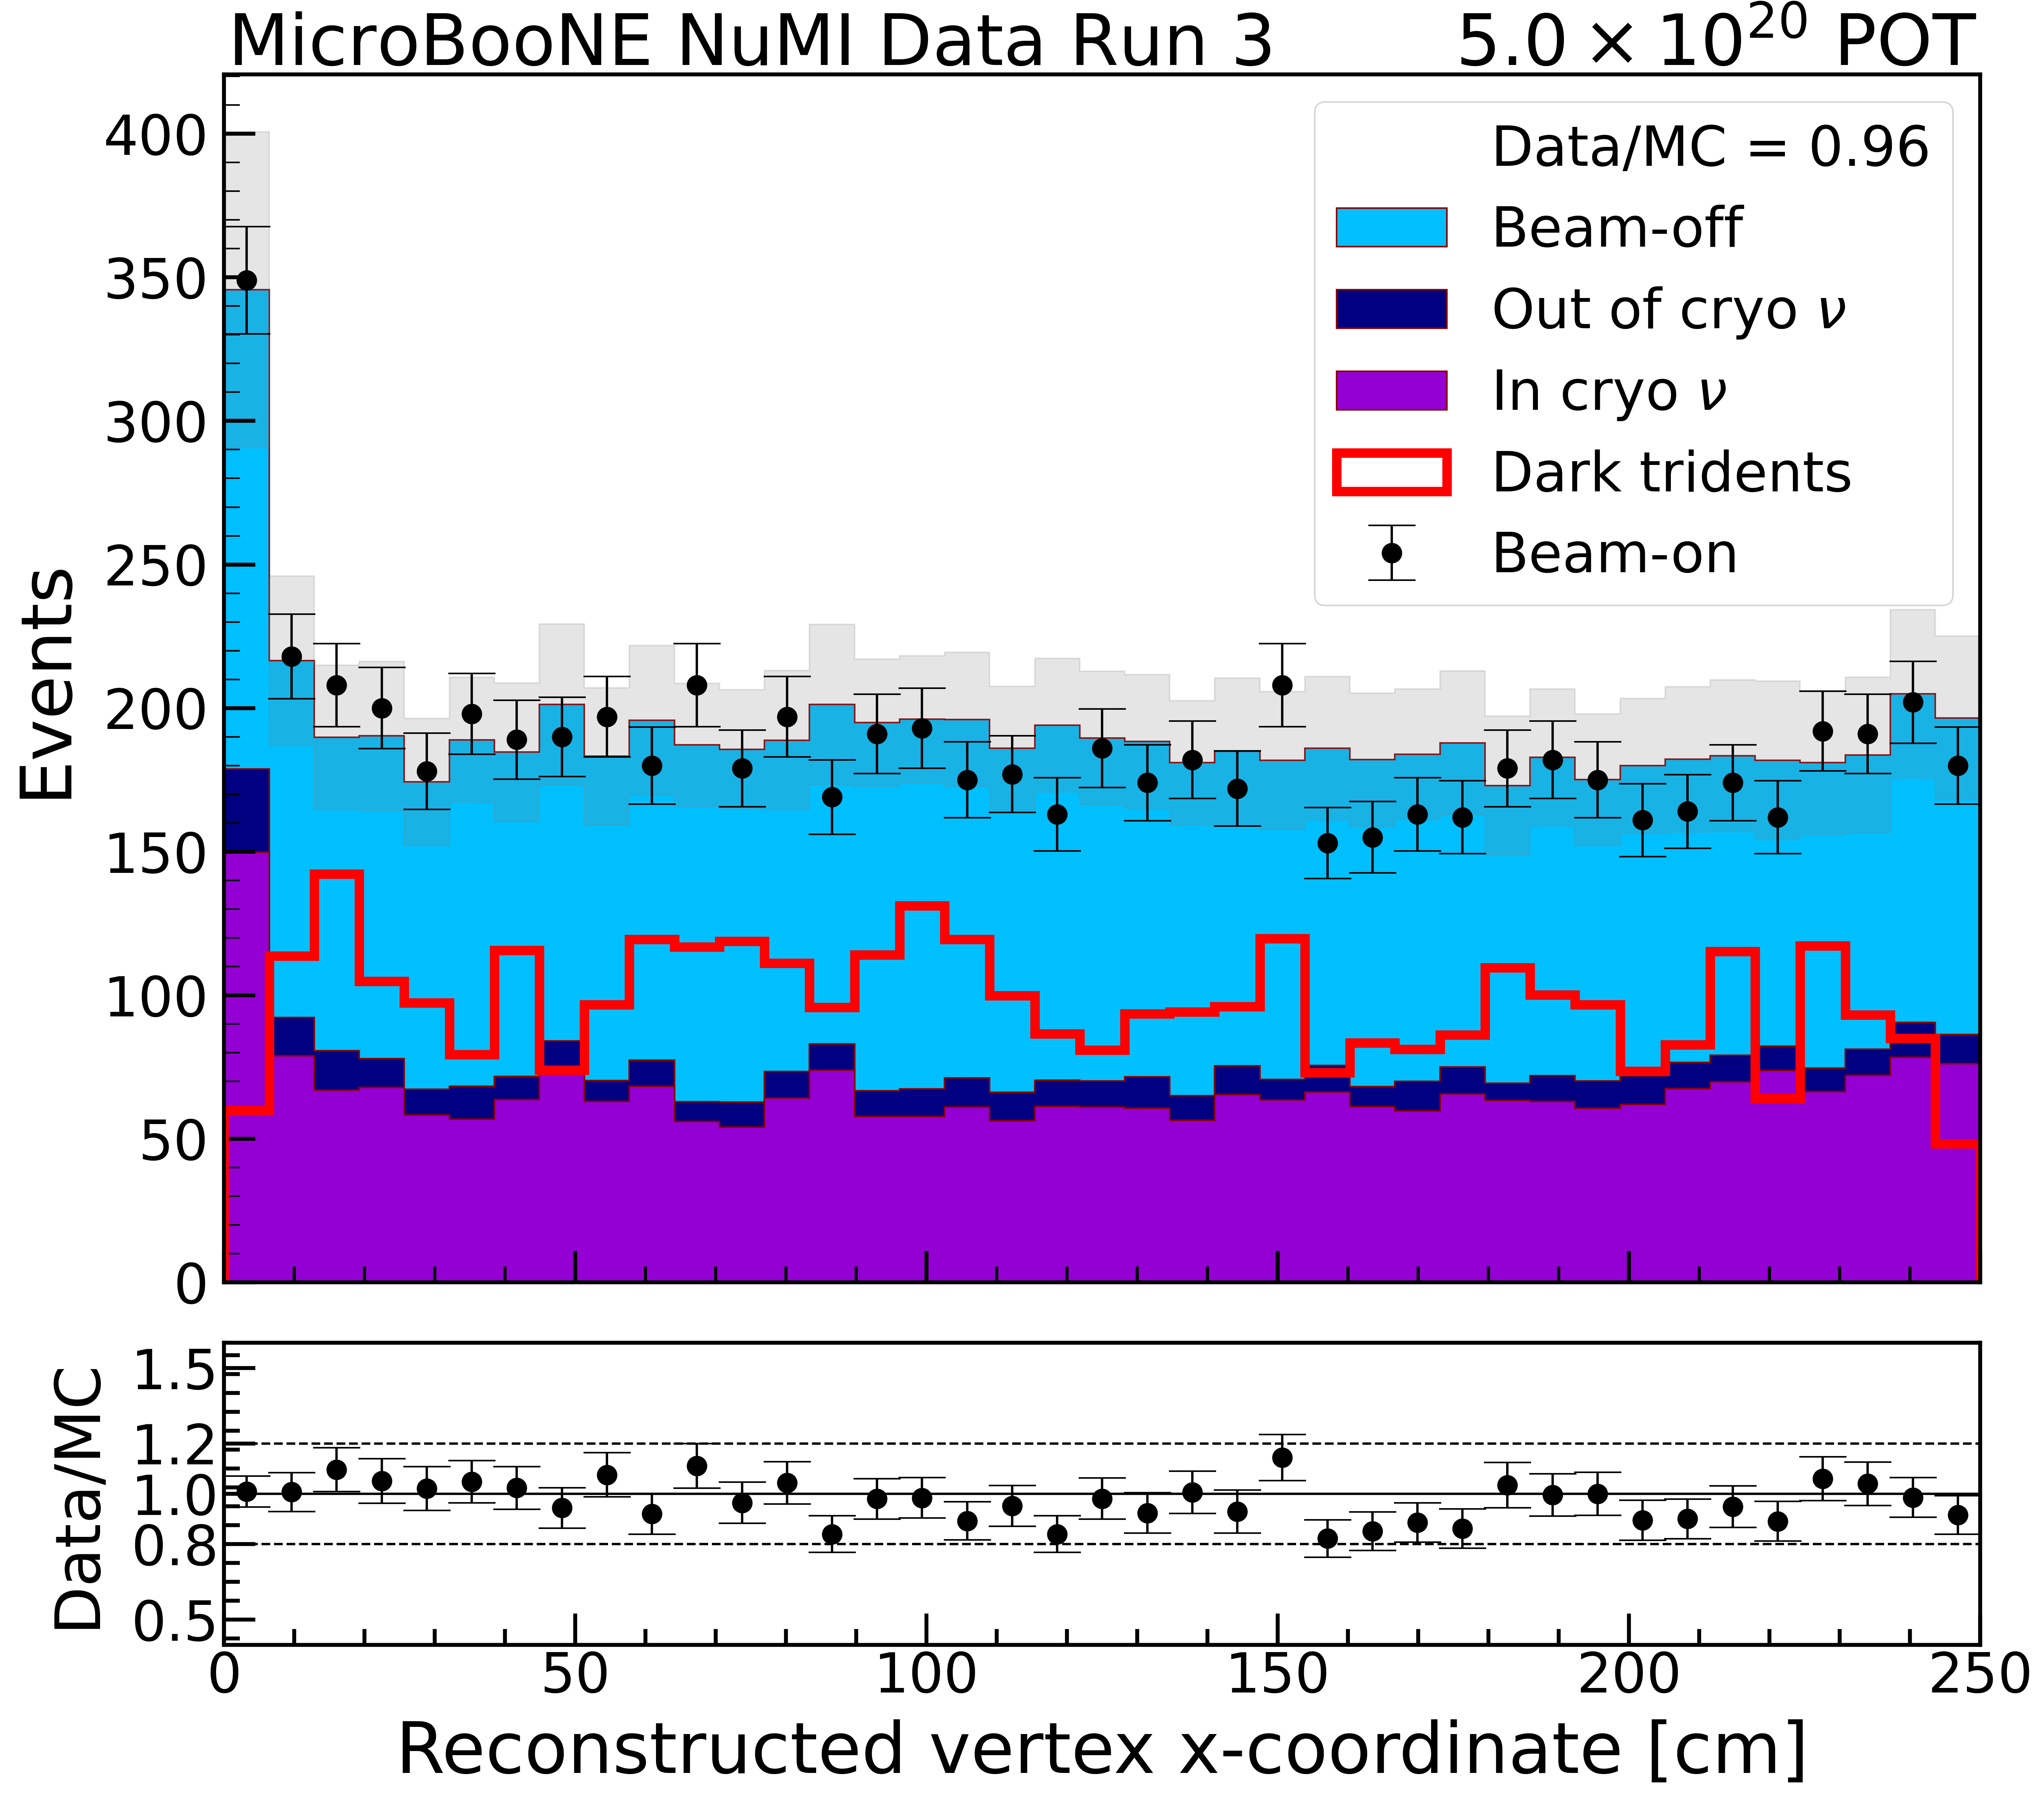

In [8]:

up_hist = 250.
down_hist = 0.
up_plot = 250
down_plot = 0
my_custom_bins = np.linspace(down_hist,up_hist,nbins)
variable = 'reco_vertex_x'

'''
variable_aux = 'reco_vertex_size'

df_nu = df_nu[df_nu[variable_aux] > 0.]
df_dirt = df_dirt[df_dirt[variable_aux] > 0.]
df_beamoff = df_beamoff[df_beamoff[variable_aux] > 0.]
df_beamon = df_beamon[df_beamon[variable_aux] > 0.]

'''


(counts_signal, bins_signal) = np.histogram(df_signal[variable], bins = my_custom_bins)
(counts_nu, bins_nu) = np.histogram(df_nu[variable], bins = my_custom_bins, weights = df_nu['weight'])
(counts_dirt, bins_dirt) = np.histogram(df_dirt[variable], bins = my_custom_bins, weights = df_dirt['weight'])
(counts_beamoff, bins_beamoff) = np.histogram(df_beamoff[variable], bins = my_custom_bins)
(counts_beamon, bins_beamon) = np.histogram(df_beamon[variable], bins = my_custom_bins)


print(np.sum(counts_signal)*signal_scaling)

counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling

stacked_colors = ["darkviolet","navy","deepskyblue"]
stacked_legend = [nu_legend, dirt_legend, beamoff_legend]
stacked_bins = [bins_nu[:-1], bins_dirt[:-1], bins_beamoff[:-1]]
stacked_list = [counts_nu*nu_scaling, counts_dirt*dirt_scaling, counts_beamoff*offbeam_scaling ]

# Getting stats error 
stats_nu = GetStatsUncert(df_nu, df_nu['weight']*nu_scaling,my_custom_bins,variable)
stats_dirt = GetStatsUncert(df_dirt, df_dirt['weight']*dirt_scaling,my_custom_bins,variable)
stats_beamoff = GetStatsUncert(df_beamoff, np.ones(len(df_beamoff))*offbeam_scaling,my_custom_bins,variable)
stats_total = np.sqrt(stats_nu + stats_dirt + stats_beamoff)

nu_CV = (counts_nu*nu_scaling)
sigma_detvar = nu_CV*detvars_uncertainty
sigma_multisim = nu_CV*multisim_uncertainty

sigma_nu = np.sqrt(stats_nu + sigma_detvar**2 + sigma_multisim**2)
sigma_dirt = np.sqrt(stats_dirt)
sigma_beamoff = np.sqrt(stats_beamoff)


total_error_mc = np.sqrt(sigma_nu**2 + sigma_dirt**2 + sigma_beamoff**2)
stats_error = (stats_total)/(counts_bkg)
stats_up = counts_bkg + total_error_mc
stats_down = counts_bkg - total_error_mc


# Trick for right error band on histograms 
bins_err = np.copy(bins_nu)
bins_err = np.append(bins_err,[bins_err[-1] + (bins_err[2] - bins_err[1])])
stats_up = np.append(stats_up,[stats_up[-1],stats_up[-1] ])
stats_down = np.append(stats_down,[stats_down[-1],stats_up[-1]])


fig, ax = plt.subplots(2,1,figsize=(20,18),dpi=300,gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.08})


for axis in ['top', 'bottom', 'left', 'right']:
    ax[0].spines[axis].set_linewidth(2.5)  # change width
    ax[0].spines[axis].set_color('black')    # change color
    
for axis in ['top', 'bottom', 'left', 'right']:
    ax[1].spines[axis].set_linewidth(2.5)  # change width
    ax[1].spines[axis].set_color('black')    # change color
    
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_minor_locator(AutoMinorLocator())  


if(data):
    ax[0].plot([], [], ' ', label=f"Data/MC = {data_mc:.2f}")   

ax[0].set_title(r'MicroBooNE Simulation' + ' ' + run_flag,fontsize=35)   
ax[0].hist(stacked_bins, bins = bins_nu, weights = stacked_list, histtype='stepfilled',stacked=True, color = stacked_colors, edgecolor="darkred", label = stacked_legend)
ax[0].fill_between(bins_err, stats_up, stats_down,color='gray',alpha=0.2,step='post')
if(data):
    ax[0].set_title(r'MicroBooNE NuMI Data' + ' ' + run_flag + "        "+ pot_label ,fontsize=45)
    ax[0].errorbar(bins_nu[:-1]+ 0.5*(bins_nu[1:] - bins_nu[:-1]),counts_beamon,yerr=np.sqrt(counts_beamon),fmt='o',markersize=12, capsize=15, color='black',label=beamon_legend)
ax[0].hist(bins_signal[:-1], bins = bins_signal,weights=counts_signal*signal_scaling*extra_factor, histtype='step',label=dt_legend ,fill=False, edgecolor='red', linewidth=6)
ax[0].legend(fontsize=35)
ax[0].tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10, labelsize=35)
ax[0].tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False, labelsize=35)
ax[0].tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10, bottom=True,top=False,labelbottom=False)
ax[0].tick_params(axis="x", which='minor', direction="in",length=10,width=2.0, bottom=True,top=False,labelbottom=False)
ax[0].set_xlim(down_plot,up_plot)
ax[0].set_ylabel("Events",fontsize=45, labelpad=15) 



total_pred = (counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling )
ratio = (counts_beamon)/(total_pred)
total_error = np.abs(ratio)*np.sqrt( (np.sqrt(counts_beamon)/(counts_beamon))**2 + (stats_total/total_pred)**2)



ax[1].errorbar(bins_nu[:-1]+ 0.5*(bins_nu[1:] - bins_nu[:-1]),ratio,yerr=total_error,fmt='o',markersize=12,capsize=15,color='black')
ax[1].hlines(0.,down_plot,up_plot,color='black',linewidth=1.5)
ax[1].hlines(1.0,down_plot,up_plot,color='black',linewidth=1.5)
ax[1].hlines(0.8,down_plot,up_plot,color='black',linestyle="--",linewidth=1.5)
ax[1].hlines(1.2,down_plot,up_plot,color='black',linestyle="--",linewidth=1.5)
ax[1].tick_params(axis='both', which='major',direction="in", length=20, width=2.5, labelsize=35)
ax[1].tick_params(axis='both', which='minor',direction="in", length=10, width=2.5, labelsize=35)
ax[1].set_yticks([0.5,0.8,1.0,1.2,1.5])
ax[1].set_ylim(0.4,1.6)
ax[1].set_xlabel(r'Reconstructed vertex x-coordinate [cm]',fontsize=45,labelpad=10)
ax[1].set_xlim(down_plot,up_plot)
ax[1].set_ylabel(r'Data/MC',fontsize=40,labelpad=15)
plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V.png",bbox_inches="tight")
plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V.pdf",bbox_inches="tight")
plt.show()


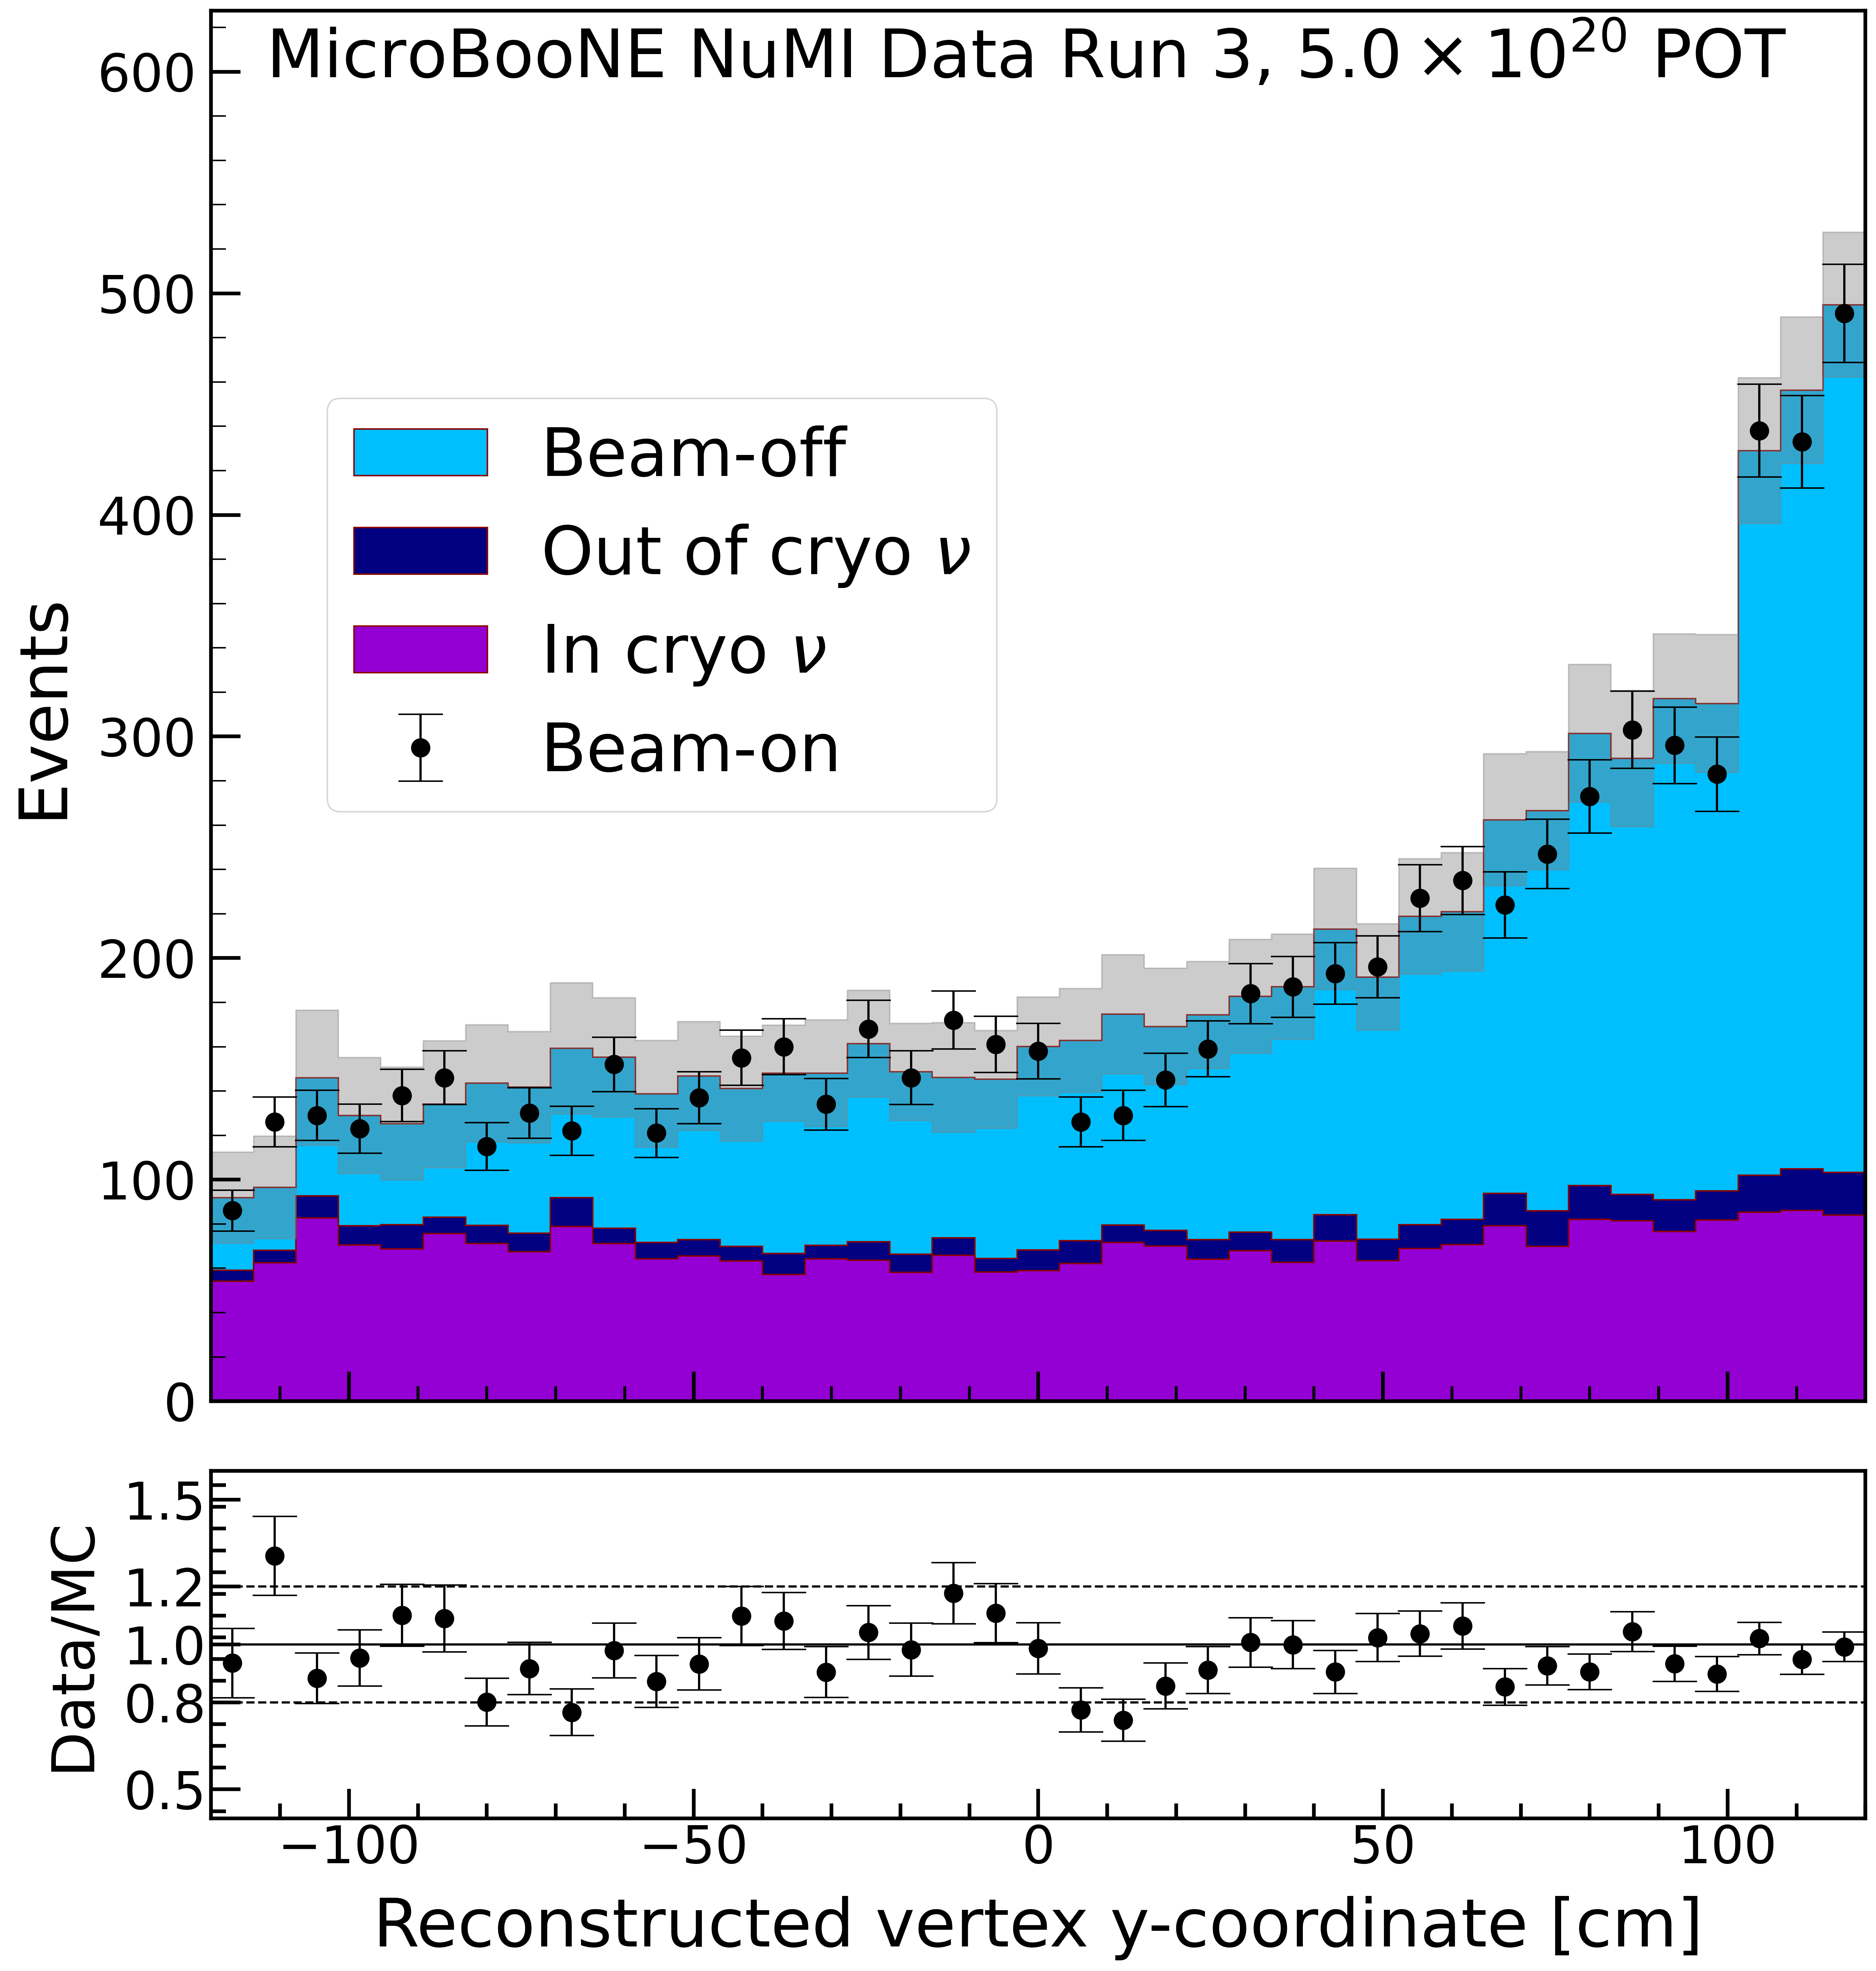

In [9]:
up_hist = 120.
down_hist = -120.
up_plot = 120.
down_plot = -120.
my_custom_bins = np.linspace(down_hist,up_hist,nbins)
variable = 'reco_vertex_y'
variable_signal ='v_y'

(counts_signal, bins_signal) = np.histogram(df_signal[variable], bins = my_custom_bins)
(counts_nu, bins_nu) = np.histogram(df_nu[variable], bins = my_custom_bins, weights = df_nu['weight'])
(counts_dirt, bins_dirt) = np.histogram(df_dirt[variable], bins = my_custom_bins, weights = df_dirt['weight'])
(counts_beamoff, bins_beamoff) = np.histogram(df_beamoff[variable], bins = my_custom_bins)
(counts_beamon, bins_beamon) = np.histogram(df_beamon[variable], bins = my_custom_bins)


counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling

stacked_colors = ["darkviolet","navy","deepskyblue"]
stacked_legend = [nu_legend, dirt_legend, beamoff_legend]
stacked_bins = [bins_nu[:-1], bins_dirt[:-1], bins_beamoff[:-1]]
stacked_list = [counts_nu*nu_scaling, counts_dirt*dirt_scaling, counts_beamoff*offbeam_scaling ]


# Getting stats error 
counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling
stats_nu = GetStatsUncert(df_nu, df_nu['weight']*nu_scaling,my_custom_bins,variable)
stats_dirt = GetStatsUncert(df_dirt, df_dirt['weight']*dirt_scaling,my_custom_bins,variable)
stats_beamoff = GetStatsUncert(df_beamoff, np.ones(len(df_beamoff))*offbeam_scaling,my_custom_bins,variable)
stats_total = np.sqrt(stats_nu + stats_dirt + stats_beamoff)

nu_CV = (counts_nu*nu_scaling)
sigma_detvar = nu_CV*detvars_uncertainty
sigma_multisim = nu_CV*multisim_uncertainty

sigma_nu = np.sqrt(stats_nu + sigma_detvar**2 + sigma_multisim**2)
sigma_dirt = np.sqrt(stats_dirt)
sigma_beamoff = np.sqrt(stats_beamoff)


total_error_mc = np.sqrt(sigma_nu**2 + sigma_dirt**2 + sigma_beamoff**2)
stats_error = (stats_total)/(counts_bkg)
stats_up = counts_bkg + total_error_mc
stats_down = counts_bkg - total_error_mc

# Trick for right error band on histograms 
bins_err = np.copy(bins_nu)
bins_err = np.append(bins_err,[bins_err[-1] + (bins_err[2] - bins_err[1])])
stats_up = np.append(stats_up,[stats_up[-1],stats_up[-1] ])
stats_down = np.append(stats_down,[stats_down[-1],stats_up[-1]])



ffig, ax = plt.subplots(2,1,figsize=(20,22),dpi=300,gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.08})


for axis in ['top', 'bottom', 'left', 'right']:
    ax[0].spines[axis].set_linewidth(2.5)  # change width
    ax[0].spines[axis].set_color('black')    # change color
    
for axis in ['top', 'bottom', 'left', 'right']:
    ax[1].spines[axis].set_linewidth(2.5)  # change width
    ax[1].spines[axis].set_color('black')    # change color

    
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_minor_locator(AutoMinorLocator())  


#if(data):
    #ax[0].plot([], [], ' ', label=f"Data/MC = {data_mc:.2f}")   


ax[0].hist(stacked_bins, bins = bins_nu, weights = stacked_list, histtype='stepfilled',stacked=True, color = stacked_colors, edgecolor="darkred", label = stacked_legend)
ax[0].fill_between(bins_err, stats_up, stats_down,color='gray',alpha=0.4,step='post')
if(data):
    ax[0].text(-112,stats_up[-1]+70, r'MicroBooNE NuMI Data' + ' ' + run_flag + ", "+ pot_label ,fontsize=45)
    ax[0].errorbar(bins_nu[:-1]+ 0.5*(bins_nu[1:] - bins_nu[:-1]),counts_beamon,yerr=np.sqrt(counts_beamon),fmt='o',markersize=12, capsize=15, color='black',label=beamon_legend)
#ax[0].hist(bins_signal[:-1], bins = bins_signal,weights=counts_signal*signal_scaling*extra_factor, histtype='step',label=dt_legend ,fill=False, edgecolor='red', linewidth=6)
ax[0].legend(fontsize=45,loc='lower left',bbox_to_anchor=(0.05,0.4))
ax[0].tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10, labelsize=35)
ax[0].tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False, labelsize=35)
ax[0].tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10, bottom=True,top=False,labelbottom=False)
ax[0].tick_params(axis="x", which='minor', direction="in",length=10,width=2.0, bottom=True,top=False,labelbottom=False)
ax[0].set_xlim(down_plot,up_plot)
ax[0].set_ylim(0.,stats_up[-1]+100)
#ax[0].axvline(-116.5,ymin=0,ymax=stats_up[-1]+100,color='black',lw=3.)
#ax[0].axvline(116.5,ymin=0,ymax=stats_up[-1]+100,color='black',lw=3.)
ax[0].set_ylabel("Events",fontsize=45, labelpad=15) 



total_pred = (counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling )
ratio = (counts_beamon)/(total_pred)
total_error = np.abs(ratio)*np.sqrt( (np.sqrt(counts_beamon)/(counts_beamon))**2 + (stats_total/total_pred)**2)



ax[1].errorbar(bins_nu[:-1]+ 0.5*(bins_nu[1:] - bins_nu[:-1]),ratio,yerr=total_error,fmt='o',markersize=12,capsize=15,color='black')
ax[1].hlines(0.,down_plot,up_plot,color='black',linewidth=1.5)
ax[1].hlines(1.0,down_plot,up_plot,color='black',linewidth=1.5)
ax[1].hlines(0.8,down_plot,up_plot,color='black',linestyle="--",linewidth=1.5)
ax[1].hlines(1.2,down_plot,up_plot,color='black',linestyle="--",linewidth=1.5)
ax[1].tick_params(axis='both', which='major',direction="in", length=20, width=2.5, labelsize=35)
ax[1].tick_params(axis='both', which='minor',direction="in", length=10, width=2.5, labelsize=35)
ax[1].set_yticks([0.5,0.8,1.0,1.2,1.5])
ax[1].set_ylim(0.4,1.6)
ax[1].set_xlabel(r'Reconstructed vertex y-coordinate [cm]',fontsize=45,labelpad=15)
ax[1].set_xlim(down_plot,up_plot)
ax[1].set_ylabel(r'Data/MC',fontsize=40,labelpad=15)
plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V.png",bbox_inches="tight")
plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V.pdf",bbox_inches="tight")
plt.show()

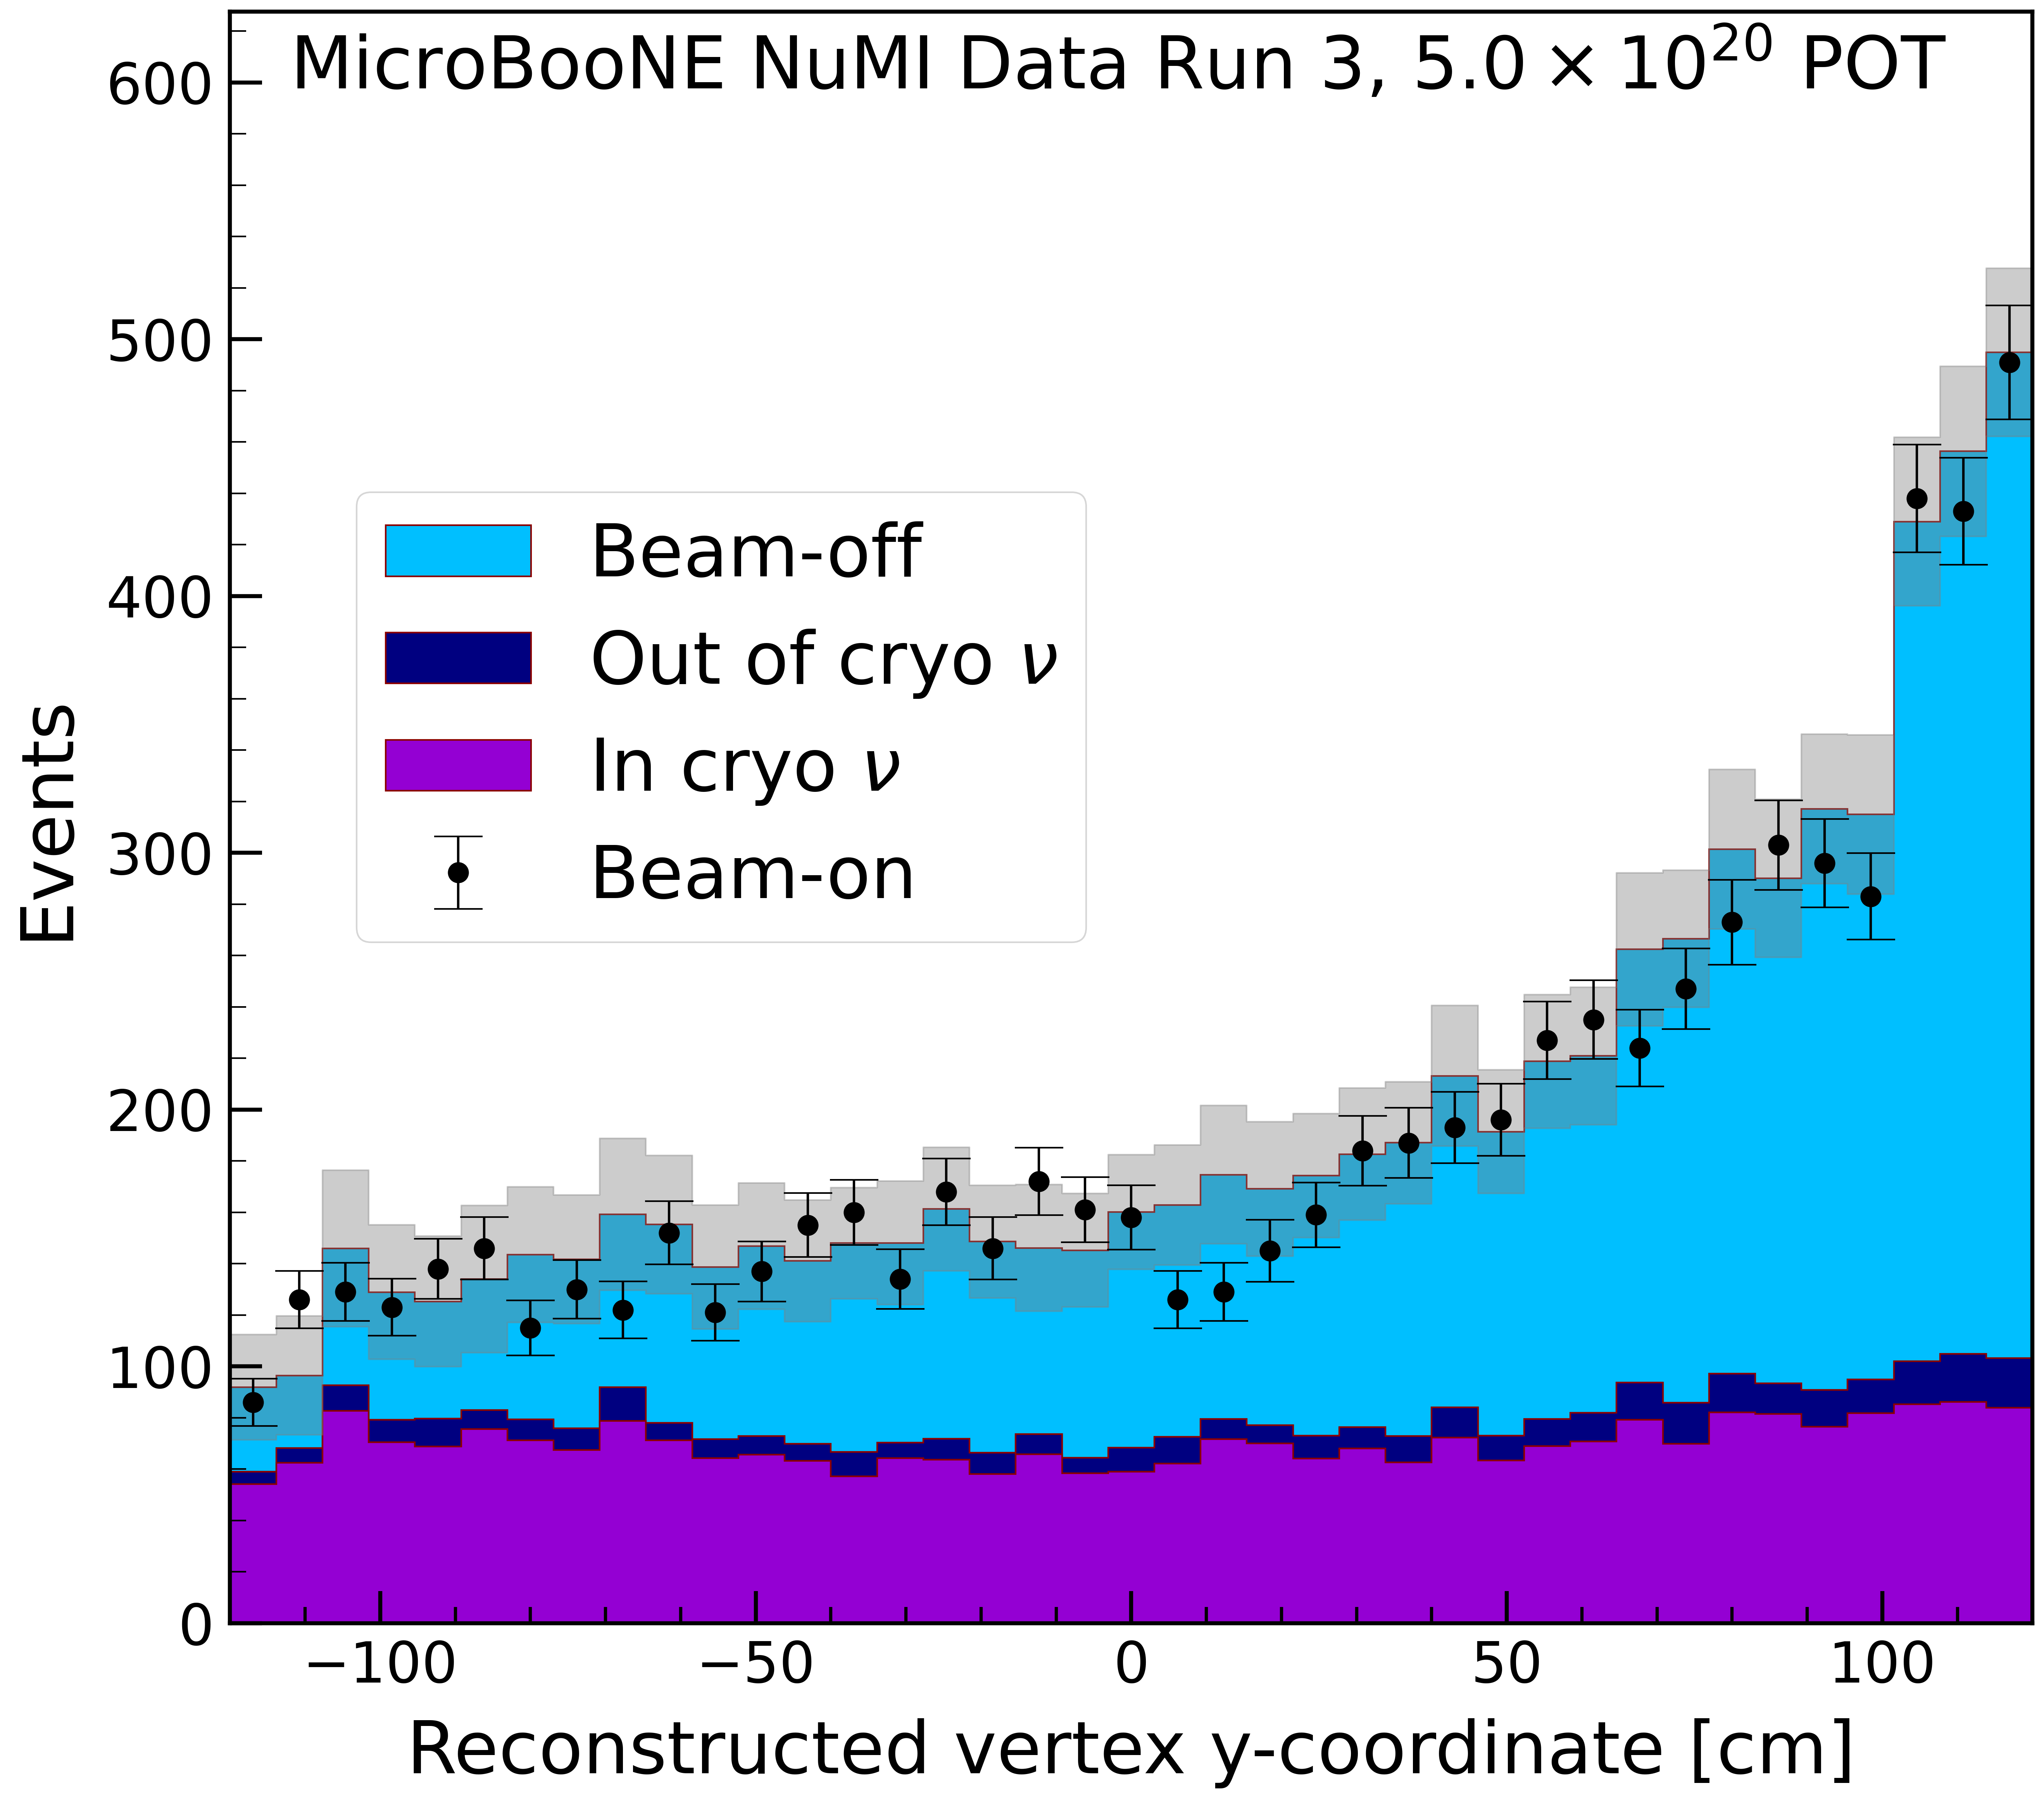

In [10]:
up_hist = 120.
down_hist = -120.
up_plot = 120.
down_plot = -120.
my_custom_bins = np.linspace(down_hist,up_hist,nbins)
variable = 'reco_vertex_y'
variable_signal ='v_y'

(counts_signal, bins_signal) = np.histogram(df_signal[variable], bins = my_custom_bins)
(counts_nu, bins_nu) = np.histogram(df_nu[variable], bins = my_custom_bins, weights = df_nu['weight'])
(counts_dirt, bins_dirt) = np.histogram(df_dirt[variable], bins = my_custom_bins, weights = df_dirt['weight'])
(counts_beamoff, bins_beamoff) = np.histogram(df_beamoff[variable], bins = my_custom_bins)
(counts_beamon, bins_beamon) = np.histogram(df_beamon[variable], bins = my_custom_bins)


counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling

stacked_colors = ["darkviolet","navy","deepskyblue"]
stacked_legend = [nu_legend, dirt_legend, beamoff_legend]
stacked_bins = [bins_nu[:-1], bins_dirt[:-1], bins_beamoff[:-1]]
stacked_list = [counts_nu*nu_scaling, counts_dirt*dirt_scaling, counts_beamoff*offbeam_scaling ]


# Getting stats error 
counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling
stats_nu = GetStatsUncert(df_nu, df_nu['weight']*nu_scaling,my_custom_bins,variable)
stats_dirt = GetStatsUncert(df_dirt, df_dirt['weight']*dirt_scaling,my_custom_bins,variable)
stats_beamoff = GetStatsUncert(df_beamoff, np.ones(len(df_beamoff))*offbeam_scaling,my_custom_bins,variable)
stats_total = np.sqrt(stats_nu + stats_dirt + stats_beamoff)

nu_CV = (counts_nu*nu_scaling)
sigma_detvar = nu_CV*detvars_uncertainty
sigma_multisim = nu_CV*multisim_uncertainty

sigma_nu = np.sqrt(stats_nu + sigma_detvar**2 + sigma_multisim**2)
sigma_dirt = np.sqrt(stats_dirt)
sigma_beamoff = np.sqrt(stats_beamoff)


total_error_mc = np.sqrt(sigma_nu**2 + sigma_dirt**2 + sigma_beamoff**2)
stats_error = (stats_total)/(counts_bkg)
stats_up = counts_bkg + total_error_mc
stats_down = counts_bkg - total_error_mc

# Trick for right error band on histograms 
bins_err = np.copy(bins_nu)
bins_err = np.append(bins_err,[bins_err[-1] + (bins_err[2] - bins_err[1])])
stats_up = np.append(stats_up,[stats_up[-1],stats_up[-1] ])
stats_down = np.append(stats_down,[stats_down[-1],stats_up[-1]])



ffig, ax = plt.subplots(1,1,figsize=(20,18),dpi=300)


for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2.5)  # change width
    ax.spines[axis].set_color('black')    # change color
    
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())


ax.hist(stacked_bins, bins = bins_nu, weights = stacked_list, histtype='stepfilled',stacked=True, color = stacked_colors, edgecolor="darkred", label = stacked_legend)
ax.fill_between(bins_err, stats_up, stats_down,color='gray',alpha=0.4,step='post')
if(data):
    ax.text(-112,stats_up[-1]+70, r'MicroBooNE NuMI Data' + ' ' + run_flag + ", "+ pot_label ,fontsize=45)
    ax.errorbar(bins_nu[:-1]+ 0.5*(bins_nu[1:] - bins_nu[:-1]),counts_beamon,yerr=np.sqrt(counts_beamon),fmt='o',markersize=12, capsize=15, color='black',label=beamon_legend)
#ax.hist(bins_signal[:-1], bins = bins_signal,weights=counts_signal*signal_scaling*extra_factor, histtype='step',label=dt_legend ,fill=False, edgecolor='red', linewidth=6)
ax.legend(fontsize=45,loc='lower left',bbox_to_anchor=(0.05,0.4))
ax.tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10, labelsize=35)
ax.tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False, labelsize=35)
ax.tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10, bottom=True,top=False,labelbottom=True,labelsize=35)
ax.tick_params(axis="x", which='minor', direction="in",length=10,width=2.0, bottom=True,top=False,labelbottom=True,labelsize=35)
ax.set_xlim(down_plot,up_plot)
ax.set_ylim(0.,stats_up[-1]+100)
#ax.axvline(-116.5,ymin=0,ymax=stats_up[-1]+100,color='black',lw=3.)
#ax.axvline(116.5,ymin=0,ymax=stats_up[-1]+100,color='black',lw=3.)
ax.set_ylabel("Events",fontsize=45, labelpad=15) 
ax.set_xlabel(r'Reconstructed vertex y-coordinate [cm]',fontsize=45,labelpad=15)
ax.set_xlim(down_plot,up_plot)


plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V1.png",bbox_inches="tight")
plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V1.pdf",bbox_inches="tight")
plt.show()

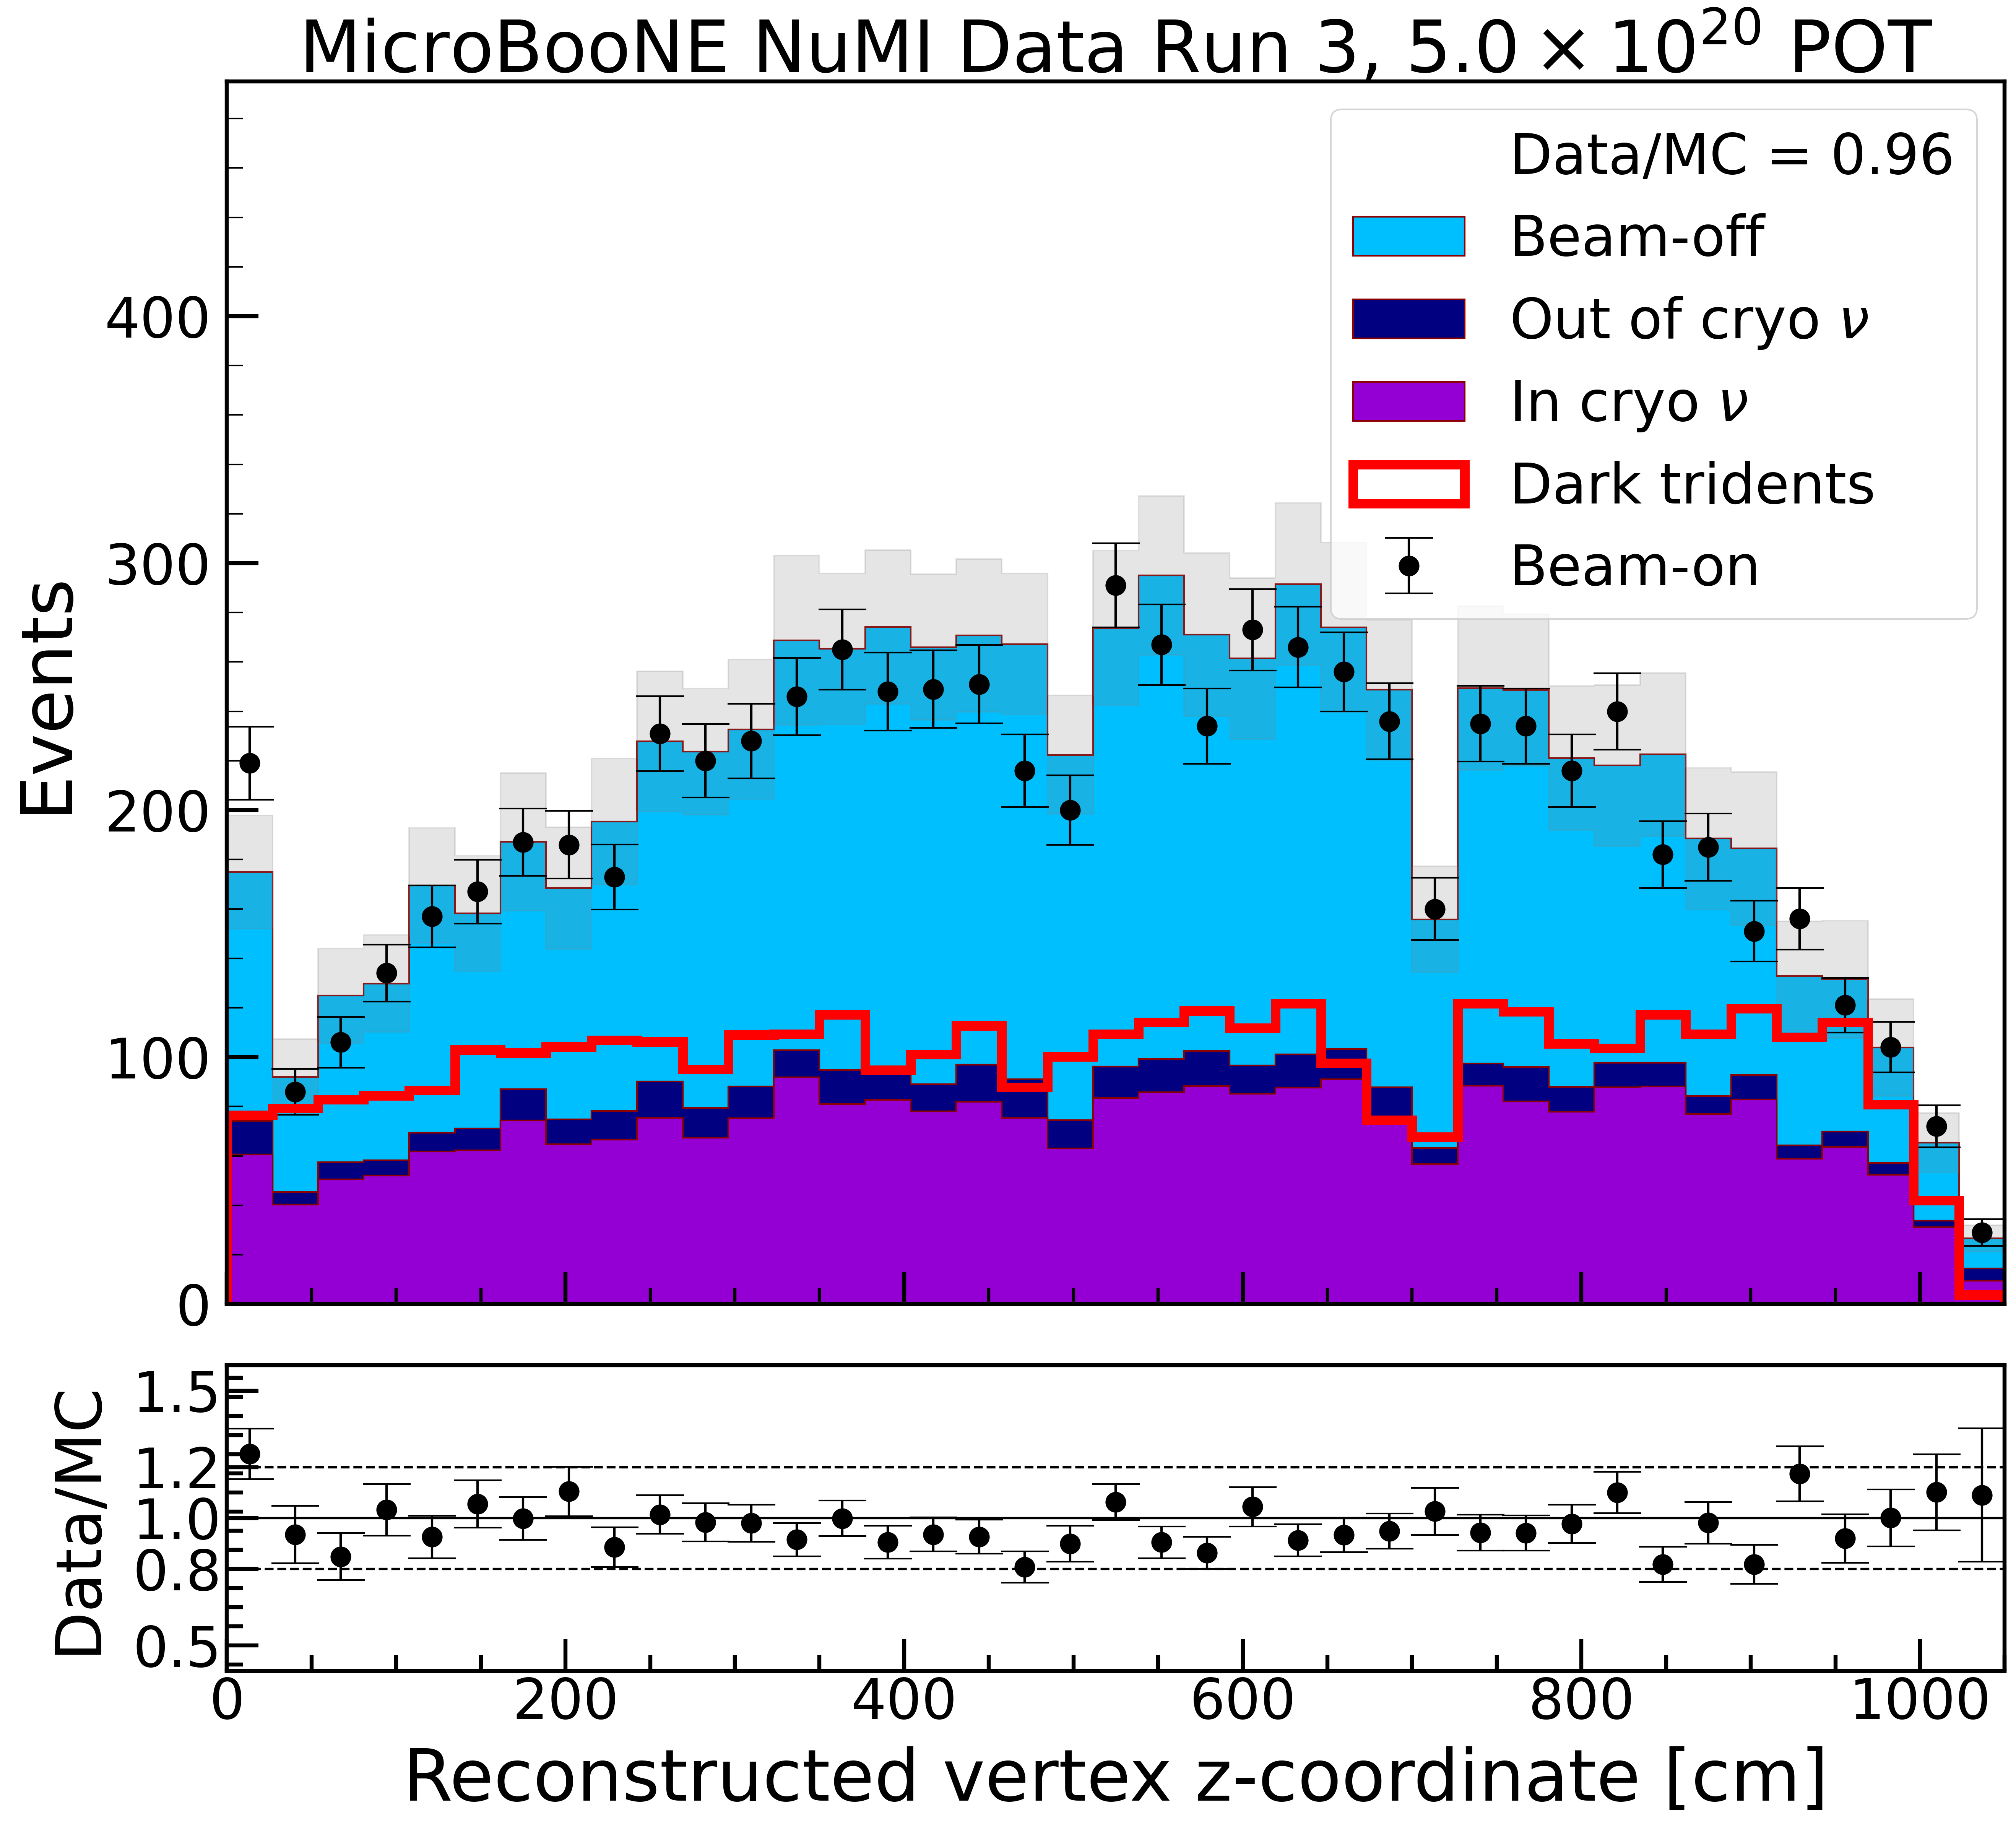

In [11]:
up_plot = 1050
down_plot = 0.
my_custom_bins = np.linspace(down_plot,up_plot,nbins)
variable = 'reco_vertex_z'
variable_signal='v_z'

(counts_signal, bins_signal) = np.histogram(df_signal[variable], bins = my_custom_bins)
(counts_nu, bins_nu) = np.histogram(df_nu[variable], bins = my_custom_bins, weights = df_nu['weight'])
(counts_dirt, bins_dirt) = np.histogram(df_dirt[variable], bins = my_custom_bins, weights = df_dirt['weight'])
(counts_beamoff, bins_beamoff) = np.histogram(df_beamoff[variable], bins = my_custom_bins)
(counts_beamon, bins_beamon) = np.histogram(df_beamon[variable], bins = my_custom_bins)


counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling


stacked_colors = ["darkviolet","navy","deepskyblue"]
stacked_legend = [nu_legend, dirt_legend, beamoff_legend]
stacked_bins = [bins_nu[:-1], bins_dirt[:-1], bins_beamoff[:-1]]
stacked_list = [counts_nu*nu_scaling, counts_dirt*dirt_scaling, counts_beamoff*offbeam_scaling ]


# Getting stats error 
counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling
stats_nu = GetStatsUncert(df_nu, df_nu['weight']*nu_scaling,my_custom_bins,variable)
stats_dirt = GetStatsUncert(df_dirt, df_dirt['weight']*dirt_scaling,my_custom_bins,variable)
stats_beamoff = GetStatsUncert(df_beamoff, np.ones(len(df_beamoff))*offbeam_scaling,my_custom_bins,variable)
stats_total = np.sqrt(stats_nu + stats_dirt + stats_beamoff)

nu_CV = (counts_nu*nu_scaling)
sigma_detvar = nu_CV*detvars_uncertainty
sigma_multisim = nu_CV*multisim_uncertainty

sigma_nu = np.sqrt(stats_nu + sigma_detvar**2 + sigma_multisim**2)
sigma_dirt = np.sqrt(stats_dirt)
sigma_beamoff = np.sqrt(stats_beamoff)


total_error_mc = np.sqrt(sigma_nu**2 + sigma_dirt**2 + sigma_beamoff**2)
stats_error = (stats_total)/(counts_bkg)
stats_up = counts_bkg + total_error_mc
stats_down = counts_bkg - total_error_mc
# Trick for right error band on histograms 
bins_err = np.copy(bins_nu)
bins_err = np.append(bins_err,[bins_err[-1] + (bins_err[2] - bins_err[1])])
stats_up = np.append(stats_up,[stats_up[-1],stats_up[-1] ])
stats_down = np.append(stats_down,[stats_down[-1],stats_up[-1]])


fig, ax = plt.subplots(2,1,figsize=(20,18),dpi=300,gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.08})


for axis in ['top', 'bottom', 'left', 'right']:
    ax[0].spines[axis].set_linewidth(2.5)  # change width
    ax[0].spines[axis].set_color('black')    # change color
    
for axis in ['top', 'bottom', 'left', 'right']:
    ax[1].spines[axis].set_linewidth(2.5)  # change width
    ax[1].spines[axis].set_color('black')    # change color
    
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_minor_locator(AutoMinorLocator())  


if(data):
    ax[0].plot([], [], ' ', label=f"Data/MC = {data_mc:.2f}")   


ax[0].set_title(r'MicroBooNE Simulation' + ' ' + run_flag,fontsize=45)   
ax[0].hist(stacked_bins, bins = bins_nu, weights = stacked_list, histtype='stepfilled',stacked=True, color = stacked_colors, edgecolor="darkred", label = stacked_legend)
ax[0].fill_between(bins_err, stats_up, stats_down,color='gray',alpha=0.2,step='post')
if(data):
    ax[0].set_title(r'MicroBooNE NuMI Data' + ' ' + run_flag + ", "+ pot_label ,fontsize=45)
    ax[0].errorbar(bins_nu[:-1]+ 0.5*(bins_nu[1:] - bins_nu[:-1]),counts_beamon,yerr=np.sqrt(counts_beamon),fmt='o',markersize=12, capsize=15, color='black',label=beamon_legend)
ax[0].hist(bins_signal[:-1], bins = bins_signal,weights=counts_signal*signal_scaling*extra_factor, histtype='step',label=dt_legend ,fill=False, edgecolor='red', linewidth=6)
ax[0].legend(fontsize=35)
ax[0].tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10, labelsize=35)
ax[0].tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False, labelsize=35)
ax[0].tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10, bottom=True,top=False,labelbottom=False)
ax[0].tick_params(axis="x", which='minor', direction="in",length=10,width=2.0, bottom=True,top=False,labelbottom=False)
ax[0].set_xlim(down_plot,up_plot)
ax[0].set_ylim(0.,np.max(counts_bkg)+200)
ax[0].set_ylabel("Events",fontsize=45, labelpad=15) 



total_pred = (counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling )
ratio = (counts_beamon)/(total_pred)
total_error = np.abs(ratio)*np.sqrt( (np.sqrt(counts_beamon)/(counts_beamon))**2 + (stats_total/total_pred)**2)



ax[1].errorbar(bins_nu[:-1]+ 0.5*(bins_nu[1:] - bins_nu[:-1]),ratio,yerr=total_error,fmt='o',markersize=12,capsize=15,color='black')
ax[1].hlines(0.,down_plot,up_plot,color='black',linewidth=1.5)
ax[1].hlines(1.0,down_plot,up_plot,color='black',linewidth=1.5)
ax[1].hlines(0.8,down_plot,up_plot,color='black',linestyle="--",linewidth=1.5)
ax[1].hlines(1.2,down_plot,up_plot,color='black',linestyle="--",linewidth=1.5)
ax[1].tick_params(axis='both', which='major',direction="in", length=20, width=2.5, labelsize=35)
ax[1].tick_params(axis='both', which='minor',direction="in", length=10, width=2.5, labelsize=35)
ax[1].set_yticks([0.5,0.8,1.0,1.2,1.5])
ax[1].set_ylim(0.4,1.6)
ax[1].set_xlabel(r'Reconstructed vertex z-coordinate [cm]',fontsize=45,labelpad=10)
ax[1].set_xlim(down_plot,up_plot)
ax[1].set_ylabel(r'Data/MC',fontsize=40,labelpad=15)
plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V.png",bbox_inches="tight")
plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V.pdf",bbox_inches="tight")
plt.show()

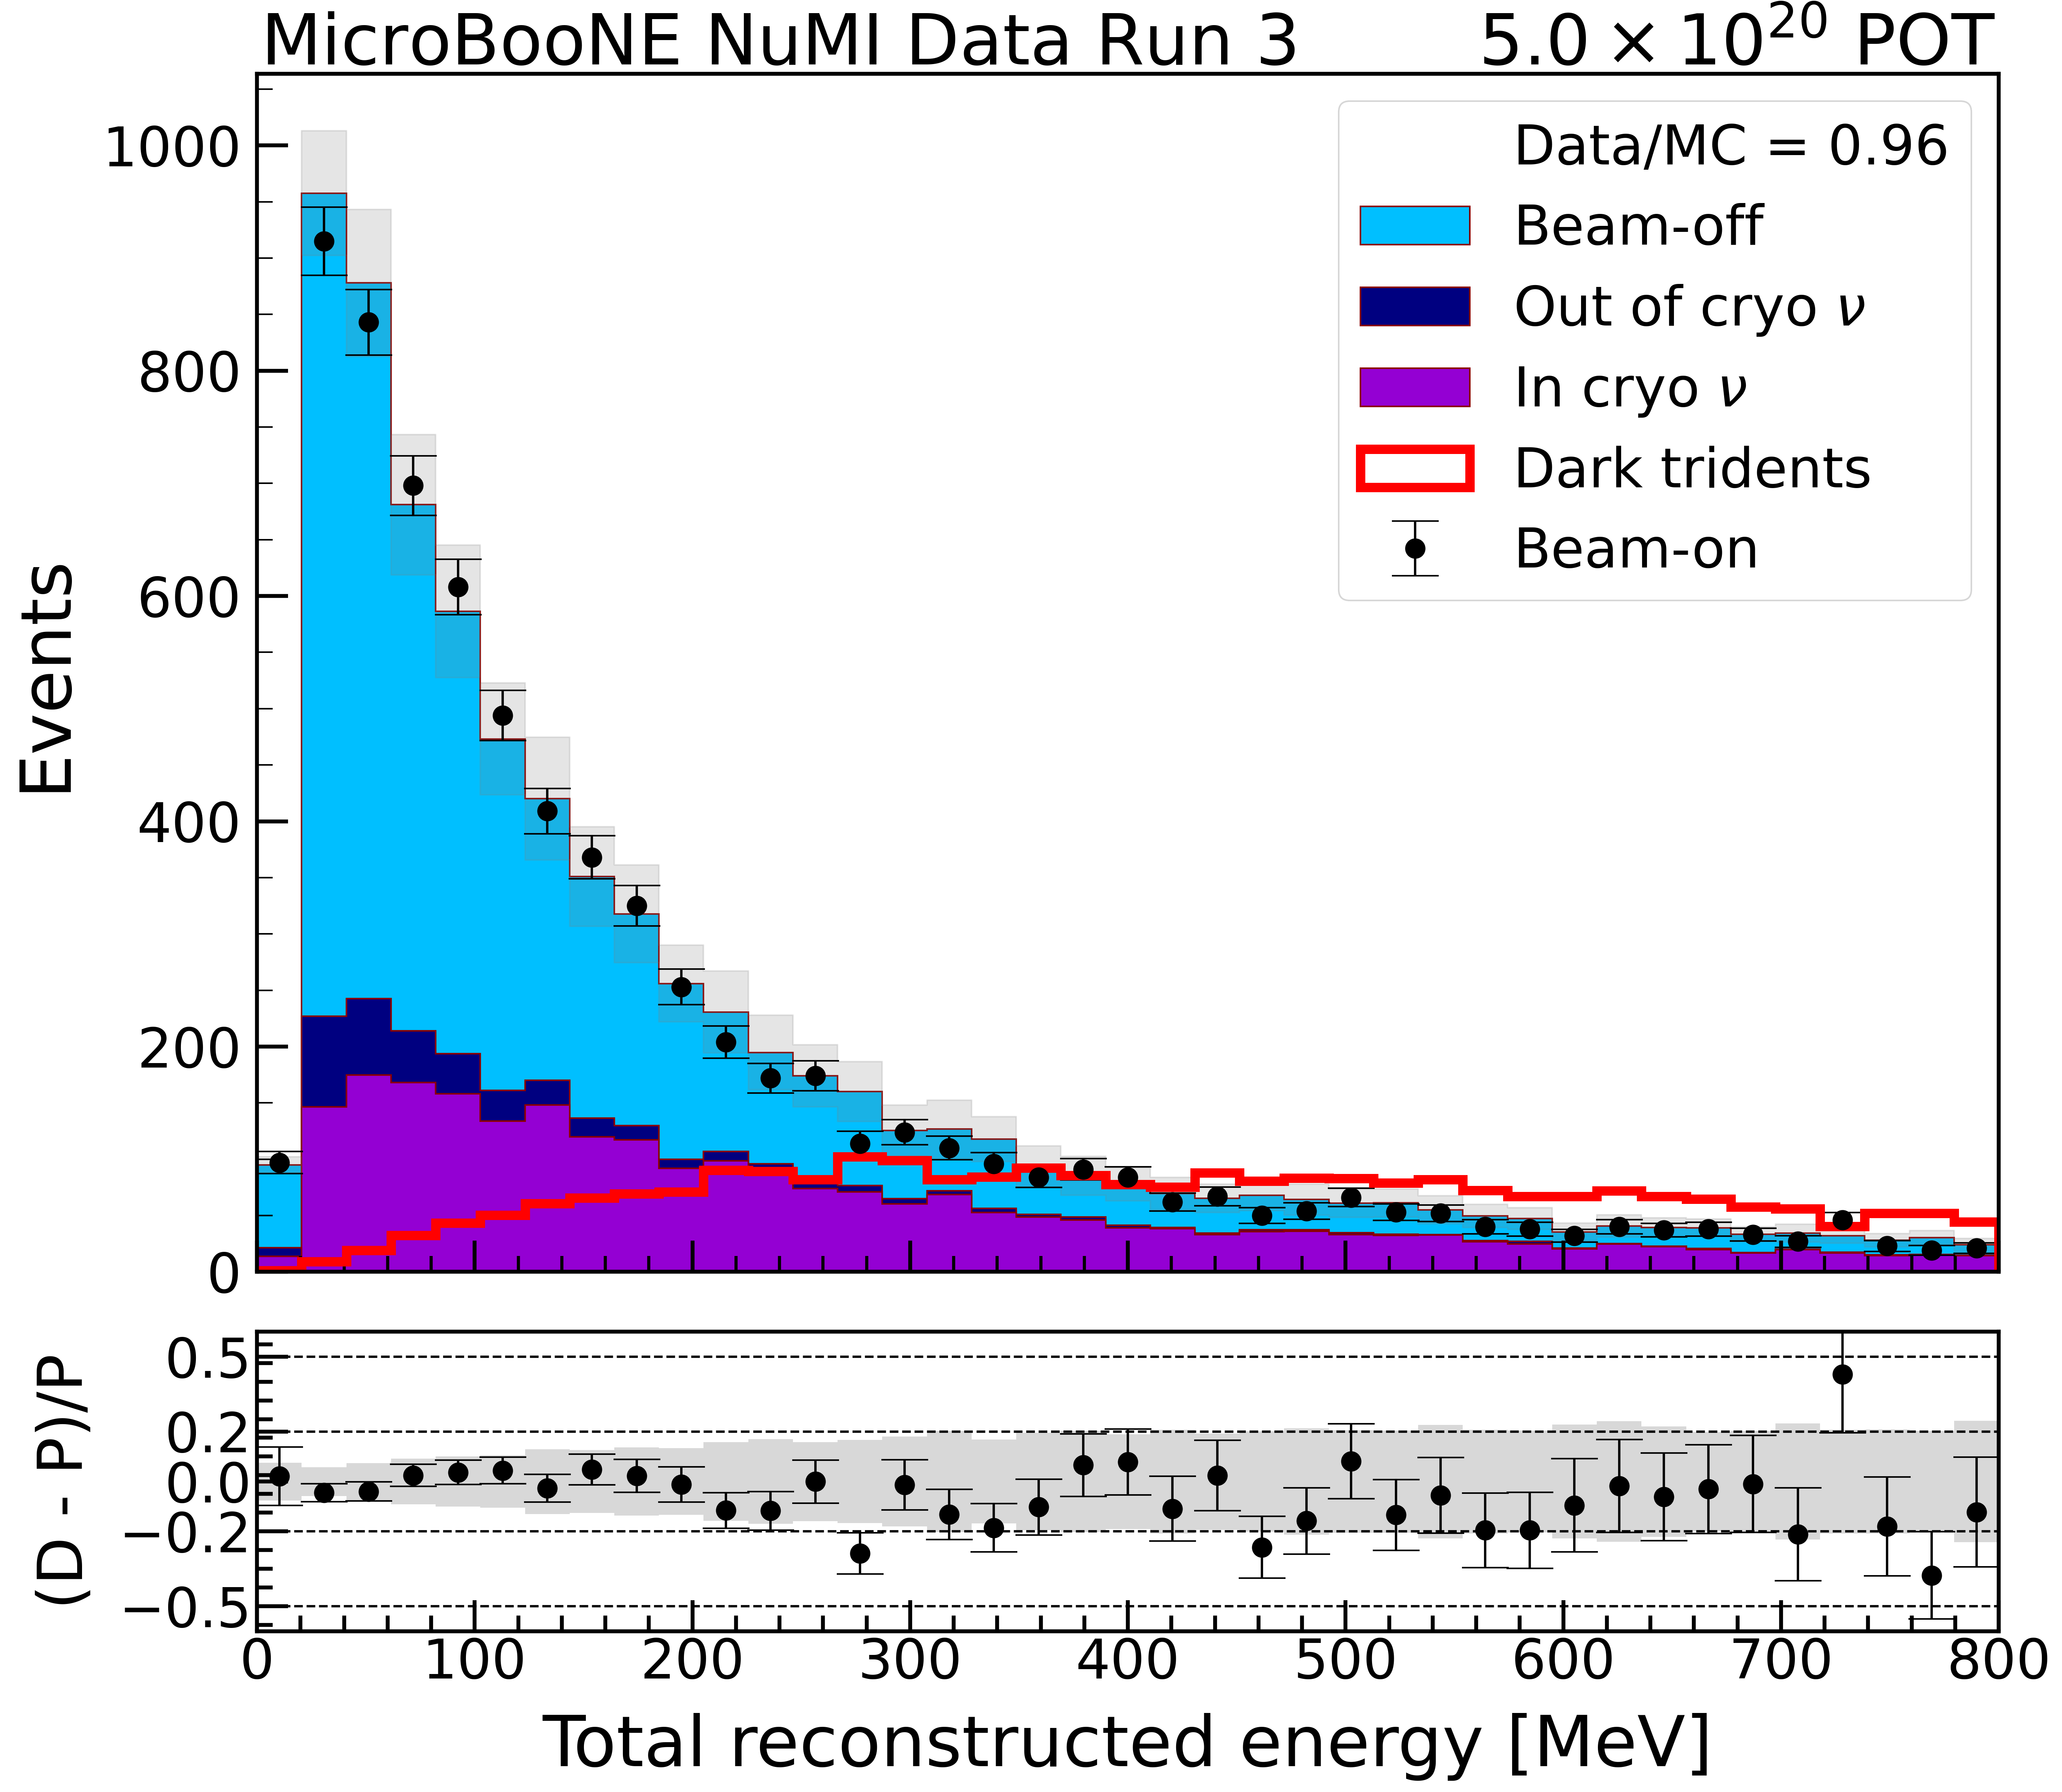

In [12]:
up_plot = 800.
down_plot = 0.
my_custom_bins = np.linspace(down_plot,up_plot,nbins)
variable = 'reco_shower_energy_max'
variable2 = 'reco_track_calo_energy_max'
variable_signal='E_total'


(counts_signal, bins_signal) = np.histogram(df_signal[variable], bins = my_custom_bins)
(counts_nu, bins_nu) = np.histogram(df_nu[variable], bins = my_custom_bins, weights = df_nu['weight'])
(counts_dirt, bins_dirt) = np.histogram(df_dirt[variable], bins = my_custom_bins, weights = df_dirt['weight'])
(counts_beamoff, bins_beamoff) = np.histogram(df_beamoff[variable], bins = my_custom_bins)
(counts_beamon, bins_beamon) = np.histogram(df_beamon[variable], bins = my_custom_bins)



counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling


stacked_colors = ["darkviolet","navy","deepskyblue"]
stacked_legend = [nu_legend, dirt_legend, beamoff_legend]
stacked_bins = [bins_nu[:-1], bins_dirt[:-1], bins_beamoff[:-1]]
stacked_list = [counts_nu*nu_scaling, counts_dirt*dirt_scaling, counts_beamoff*offbeam_scaling ]

# Getting stats error 
counts_bkg = counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling
stats_nu = GetStatsUncert(df_nu, df_nu['weight']*nu_scaling,my_custom_bins,variable)
stats_dirt = GetStatsUncert(df_dirt, df_dirt['weight']*dirt_scaling,my_custom_bins,variable)
stats_beamoff = GetStatsUncert(df_beamoff, np.ones(len(df_beamoff))*offbeam_scaling,my_custom_bins,variable)
stats_total = np.sqrt(stats_nu + stats_dirt + stats_beamoff)

nu_CV = (counts_nu*nu_scaling)
sigma_detvar = nu_CV*detvars_uncertainty
sigma_multisim = nu_CV*multisim_uncertainty

sigma_nu = np.sqrt(stats_nu + sigma_detvar**2 + sigma_multisim**2)
sigma_dirt = np.sqrt(stats_dirt)
sigma_beamoff = np.sqrt(stats_beamoff)


total_error_mc = np.sqrt(sigma_nu**2 + sigma_dirt**2 + sigma_beamoff**2)
stats_error = (stats_total)/(counts_bkg)
stats_up = counts_bkg + total_error_mc
stats_down = counts_bkg - total_error_mc


# Trick for right error band on histograms 
bins_err = np.copy(bins_nu)
bins_err = np.append(bins_err,[bins_err[-1] + (bins_err[2] - bins_err[1])])
stats_up = np.append(stats_up,[stats_up[-1],stats_up[-1] ])
stats_down = np.append(stats_down,[stats_down[-1],stats_up[-1]])


fig, ax = plt.subplots(2,1,figsize=(20,18),dpi=300,gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.08})


for axis in ['top', 'bottom', 'left', 'right']:
    ax[0].spines[axis].set_linewidth(2.5)  # change width
    ax[0].spines[axis].set_color('black')    # change color
    
for axis in ['top', 'bottom', 'left', 'right']:
    ax[1].spines[axis].set_linewidth(2.5)  # change width
    ax[1].spines[axis].set_color('black')    # change color
    
ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_minor_locator(AutoMinorLocator())  


if(data):
    ax[0].plot([], [], ' ', label=f"Data/MC = {data_mc:.2f}")   


ax[0].set_title(r'MicroBooNE Simulation' + ' ' + run_flag,fontsize=35)   
ax[0].hist(stacked_bins, bins = bins_nu, weights = stacked_list, histtype='stepfilled',stacked=True, color = stacked_colors, edgecolor="darkred", label = stacked_legend)
ax[0].fill_between(bins_err, stats_up, stats_down,color='gray',alpha=0.2,step='post')
if(data):
    ax[0].set_title(r'MicroBooNE NuMI Data' + ' ' + run_flag + "        "+ pot_label ,fontsize=45)
    ax[0].errorbar(bins_nu[:-1]+ 0.5*(bins_nu[1:] - bins_nu[:-1]),counts_beamon,yerr=np.sqrt(counts_beamon),fmt='o',markersize=12, capsize=15, color='black',label=beamon_legend)
ax[0].hist(bins_signal[:-1], bins = bins_signal,weights=counts_signal*signal_scaling*extra_factor, histtype='step',label=dt_legend ,fill=False, edgecolor='red', linewidth=6)
ax[0].legend(fontsize=35)
ax[0].tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10, labelsize=35)
ax[0].tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False, labelsize=35)
ax[0].tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10, bottom=True,top=False,labelbottom=False)
ax[0].tick_params(axis="x", which='minor', direction="in",length=10,width=2.0, bottom=True,top=False,labelbottom=False)
ax[0].set_xlim(down_plot,up_plot)
ax[0].set_ylabel("Events",fontsize=45, labelpad=15) 



total_pred = (counts_nu*nu_scaling + counts_dirt*dirt_scaling + counts_beamoff*offbeam_scaling )
ratio = (counts_beamon - total_pred)/(total_pred)
subs_error = np.sqrt( counts_beamon + stats_total**2)
total_error = np.abs(ratio)*np.sqrt( (subs_error/(counts_beamon - total_pred))**2 + (stats_total/total_pred)**2)



ax[1].errorbar(bins_nu[:-1]+ 0.5*(bins_nu[1:] - bins_nu[:-1]),ratio,yerr=total_error,fmt='o',markersize=12,capsize=15,color='black')
ax[1].hist(bins_nu[:-1], bins = bins_nu,weights=total_error_mc/counts_bkg,histtype='stepfilled',color='gray',alpha=0.3,lw=2)
ax[1].hist(bins_nu[:-1], bins = bins_nu,weights=-1*total_error_mc/counts_bkg,histtype='stepfilled',color='gray',alpha=0.3,lw=2)
ax[1].hlines(-0.5,down_plot,up_plot,color='black',linewidth=1.5,ls="--")
ax[1].hlines(0.2,down_plot,up_plot,color='black',linewidth=1.5,ls="--")
ax[1].hlines(0.5,down_plot,up_plot,color='black',linestyle="--",linewidth=1.5)
ax[1].hlines(-0.2,down_plot,up_plot,color='black',linestyle="--",linewidth=1.5)
ax[1].tick_params(axis='both', which='major',direction="in", length=20, width=2.5, labelsize=35)
ax[1].tick_params(axis='both', which='minor',direction="in", length=10, width=2.5, labelsize=35)
ax[1].set_yticks([-0.5, -0.2, 0., 0.2, 0.5])
ax[1].set_ylim(-0.6,0.6)
ax[1].set_xlabel(r'Total reconstructed energy [MeV]',fontsize=45,labelpad=15)
ax[1].set_xlim(down_plot,up_plot)
ax[1].set_ylabel(r'(D - P)/P',fontsize=40,labelpad=15)
plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V.png",bbox_inches="tight")
plt.savefig(plots_dir + "data_mc_comparison_shower_cut_" + run + "_" + variable + "_paper_V.pdf",bbox_inches="tight")

plt.show()